In [48]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [49]:
df = pd.read_csv('C:\\Users\\Vishal\\Downloads\\cepheids_final2.csv')
df

,Unnamed: 0,RAJ2000,DEJ2000,Vmag,Per,logP,M,dist
0,0,210.89823,54.376252,25.033,12.91,1.110926,-4.431843,7.815715e+06
1,1,210.89089,54.370105,24.981,18.75,1.273001,-4.905872,9.492366e+06
2,2,210.92781,54.374184,25.567,7.85,0.894870,-3.799932,7.471132e+06
3,3,210.86662,54.344730,24.231,27.10,1.432969,-5.373739,8.335809e+06
4,4,210.86653,54.343217,23.731,29.72,1.473049,-5.490961,6.988634e+06
...,...,...,...,...,...,...,...,...
168,168,210.68256,54.335558,24.964,7.60,0.880814,-3.758821,5.553468e+06
169,169,210.70181,54.327808,25.893,6.97,0.843233,-3.648907,8.098068e+06
170,170,210.71377,54.337357,25.864,8.32,0.920123,-3.873793,8.862546e+06
171,171,210.67506,54.345012,25.944,4.75,0.676694,-3.161822,6.624671e+06


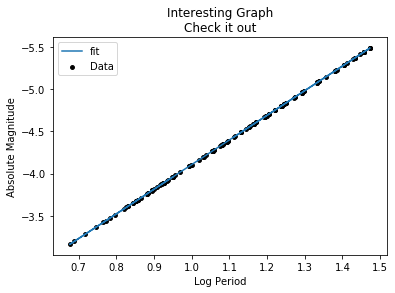

In [59]:
x = df.logP
y = df.M
plt.figure(figsize=(6, 4))
plt.scatter(x, y, label='Data',c='black',s=15)
plt.xlabel("Log Period")
plt.ylabel("Absolute Magnitude")
plt.title("Interesting Graph\nCheck it out")


plt.plot(x, y,label='fit')
plt.legend(loc='best')

plt.gca().invert_yaxis()

#this is the graph of given data

In [58]:
slope,intercept = np.polyfit(df['logP'],df['M'],1)


In [60]:
slope,intercept

(-2.9247499500000003, -1.1826619800000007)

In [72]:
# Now we take a diffrent dataset to make our own columns, why? cause we can. 
df_sam = pd.read_csv('C:\\Users\\Vishal\\Downloads\\ceph_2.csv')
df_sam.head()

,Unnamed: 0,Vmag,Per
0,0,24.437,25.35
1,1,25.069,15.70
2,2,24.881,14.59
3,3,24.794,12.11
4,4,25.036,8.57


In [73]:
# We add log of periodicity cause its better to take log values for calculations, you dont agree? 
# Come up with a better formula then

df_sam['log_Per'] = np.log10(df_sam['Per'])
df_sam.head()

,Unnamed: 0,Vmag,Per,log_Per
0,0,24.437,25.35,1.403978
1,1,25.069,15.70,1.195900
2,2,24.881,14.59,1.164055
3,3,24.794,12.11,1.083144
4,4,25.036,8.57,0.932981


In [74]:
# Now we calculate absolute magnitude using the log of periodicity and some other seceret ingridents 
df_sam['abs_mag']=intercept +(slope*df_sam['log_Per'])
df_sam.head()

,Unnamed: 0,Vmag,Per,log_Per,abs_mag
0,0,24.437,25.35,1.403978,25.600634
1,1,25.069,15.70,1.195900,25.611825
2,2,24.881,14.59,1.164055,25.613538
3,3,24.794,12.11,1.083144,25.617889
4,4,25.036,8.57,0.932981,25.625966


In [75]:
# Calculate the distance cause thats what we need

df_sam['dist'] = 10**(0.2*(df_sam['Vmag']-df_sam['abs_mag']+5))
df_sam.head()

,Unnamed: 0,Vmag,Per,log_Per,abs_mag,dist
0,0,24.437,25.35,1.403978,25.600634,5.851581
1,1,25.069,15.70,1.195900,25.611825,7.788163
2,2,24.881,14.59,1.164055,25.613538,7.136618
3,3,24.794,12.11,1.083144,25.617889,6.842615
4,4,25.036,8.57,0.932981,25.625966,7.620911


In [66]:
slope,intercept = np.polyfit(df_sam['log_Per'],df_sam['abs_mag'],1)
slope,intercept

# changing the slope and intercept values to Vmag and Per doesnt make a lot of change
# here as well as up there where we first encountered slope(R.I.P Slope, who was killed in programer brutality)

(-2.924749950000001, -1.1826619799999993)

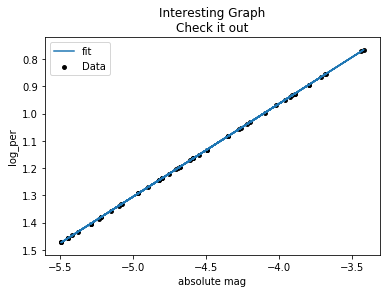

In [70]:
#now we plot the graph, and we notice that it is similar to the one above, coincidence? nope
# its cause we used the same slope, you can try it with diffrent slope, but youll get the same result

y = df_sam.log_Per
x = df_sam.abs_mag
z = df_sam.dist
plt.figure(figsize=(6, 4))
plt.scatter(x, y, label='Data',c='black',s=15)
plt.xlabel("absolute mag")
plt.ylabel("log_per")
plt.title("Interesting Graph\nCheck it out")


plt.plot(x, y,label='fit')
plt.legend(loc='best')

plt.gca().invert_yaxis()

In [91]:
df_sam1 = pd.read_csv('C:\\Users\\Vishal\\Downloads\\ceph_2.csv')
df_sam1.head()

,Unnamed: 0,Vmag,Per
0,0,24.437,25.35
1,1,25.069,15.70
2,2,24.881,14.59
3,3,24.794,12.11
4,4,25.036,8.57


In [92]:
slope,intercept = np.polyfit(df_sam1['Vmag'],df_sam1['Per'],1)
slope,intercept

(-10.548144245217234, 278.1005655345244)

In [93]:
df_sam1['log_Per'] = np.log10(df_sam1['Per'])
df_sam1.head()

,Unnamed: 0,Vmag,Per,log_Per
0,0,24.437,25.35,1.403978
1,1,25.069,15.70,1.195900
2,2,24.881,14.59,1.164055
3,3,24.794,12.11,1.083144
4,4,25.036,8.57,0.932981


In [94]:
df_sam1['abs_mag']=intercept +(slope*df_sam1['log_Per'])
df_sam1.head()
# But clearly we can see that the absolute magnitude is changing to huge values
# But lets continue

,Unnamed: 0,Vmag,Per,log_Per,abs_mag
0,0,24.437,25.35,1.403978,263.291203
1,1,25.069,15.70,1.195900,265.486043
2,2,24.881,14.59,1.164055,265.821942
3,3,24.794,12.11,1.083144,266.675405
4,4,25.036,8.57,0.932981,268.259349


In [95]:
df_sam1['dist'] = 10**(0.2*(df_sam1['Vmag']-df_sam1['abs_mag']+5))
df_sam1.head()

# Again the values are diffrent but...

,Unnamed: 0,Vmag,Per,log_Per,abs_mag,dist
0,0,24.437,25.35,1.403978,263.291203,1.694959e-47
1,1,25.069,15.70,1.195900,265.486043,8.252610e-48
2,2,24.881,14.59,1.164055,265.821942,6.483530e-48
3,3,24.794,12.11,1.083144,266.675405,4.204545e-48
4,4,25.036,8.57,0.932981,268.259349,2.266367e-48


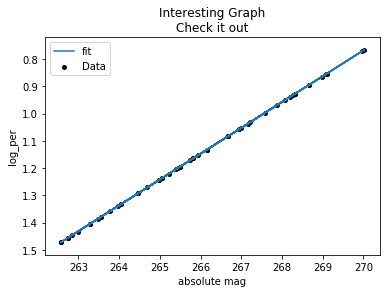

In [96]:
y = df_sam.log_Per
x = df_sam.abs_mag
z = df_sam.dist
plt.figure(figsize=(6, 4))
plt.scatter(x, y, label='Data',c='black',s=15)
plt.xlabel("absolute mag")
plt.ylabel("log_per")
plt.title("Interesting Graph\nCheck it out")


plt.plot(x, y,label='fit')
plt.legend(loc='best')

plt.gca().invert_yaxis()

# Viola we get a similar curve, but values are way beyond incorrect(to what we usually measure)
# So basically what im trying to say is, we take intercept of "log(periodicity)" and "Magnitude" only
# To get the desired output that the whole world agrees on.